# Test the code for generating correlation matrices

In [1]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

# Use this to load our modules.
module_path = os.path.abspath(os.path.join(os.getcwd(), '../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import src.correlations_sampler
importlib.reload(src.correlations_sampler)
from src.correlations_sampler import generate_random_correlation_matrix_using_trig

In [3]:
def generate_matrices_trig(nbr_trials, nbr_columns, K, constraints, shuffle_constraints=True, balanced=False):
    matrices = []
    elapsed_times = []
    for _ in range(nbr_trials):
        matrix,elapsed_time = generate_random_correlation_matrix_using_trig(
            nbr_columns, constraints, K=0.01, shuffle_constraints=shuffle_constraints, balanced=balanced)
        # If the optimization was successful, save the results.
        elapsed_times.append(elapsed_time * 1000)
        matrices.append(matrix)
    return matrices, None, None, elapsed_times

# 1 - Test using no constraints (all correlations are sampled uniformly within their boundaries)

## Test without balancing.

n=3 columns


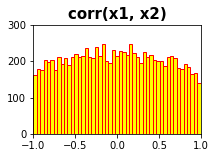

n=4 columns


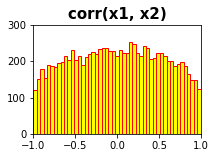

n=5 columns


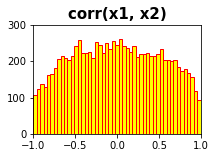

n=6 columns


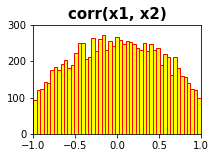

n=7 columns


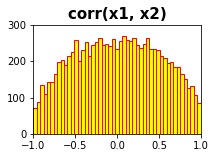

n=8 columns


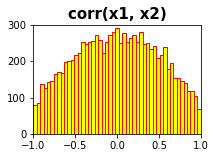

n=9 columns


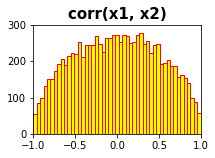

n=10 columns


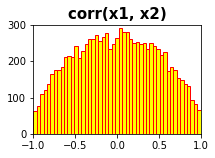

In [4]:
np.random.seed(0)

for n in range(3, 11):
    print(f'n={n} columns')
    results_constraints = generate_matrices_trig(10000, n, 0.01, constraints=[], balanced=False)[0]
    results_constraints = np.array(results_constraints)
    #print(results_constraints[3])
    fig, ax = plt.subplots(figsize=(3, 2))
    ax.hist(results_constraints[:, 0, 1], bins=np.linspace(-1, 1, 50), edgecolor='red',color='yellow')
    ax.set_xlim(-1, 1)
    ax.set_ylim(0, 300)
    ax.set_title(f'corr(x1, x2)', fontsize=15, fontweight='bold')
    plt.show()

## Test with balancing

n=3 columns


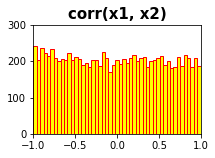

n=4 columns


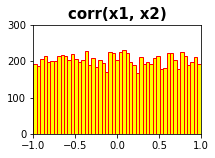

n=5 columns


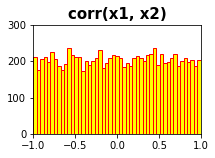

n=6 columns


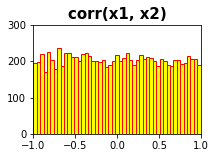

n=7 columns


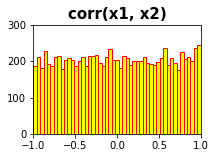

n=8 columns


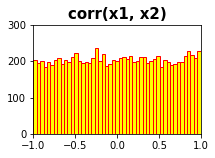

n=9 columns


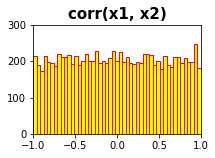

n=10 columns


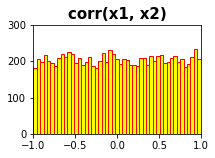

In [5]:
np.random.seed(0)

for n in range(3, 11):
    print(f'n={n} columns')
    results_constraints = generate_matrices_trig(10000, n, 0.01, constraints=[], balanced=True)[0]
    results_constraints = np.array(results_constraints)
    #print(results_constraints[3])
    fig, ax = plt.subplots(figsize=(3, 2))
    ax.hist(results_constraints[:, 0, 1], bins=np.linspace(-1, 1, 50), edgecolor='red',color='yellow')
    ax.set_xlim(-1, 1)
    ax.set_ylim(0, 300)
    ax.set_title(f'corr(x1, x2)', fontsize=15, fontweight='bold')
    plt.show()

# 2 - Test using constraints on the entire last column

## Test without balancing

The constraints are shuffled to remove bias. Hence the distribution for rho(X1, X2) is not uniform but close to.
[[ 1.          0.33314902 -0.15760689 -0.5       ]
 [ 0.33314902  1.          0.0755589  -0.4       ]
 [-0.15760689  0.0755589   1.          0.6       ]
 [-0.5        -0.4         0.6         1.        ]]


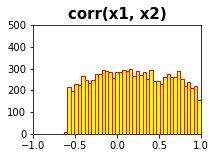

The constraints are not shuffled but rho(X1, X2) is sampled first hence its distribution is uniform.
[[ 1.          0.59599053 -0.51036529 -0.5       ]
 [ 0.59599053  1.         -0.43725325 -0.4       ]
 [-0.51036529 -0.43725325  1.          0.6       ]
 [-0.5        -0.4         0.6         1.        ]]


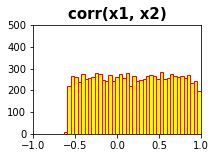

The constraints are not shuffled and rho(X1, X2) is sampled last hence its distribution is not uniform.
[[ 1.         -0.73015748 -0.69358694  0.6       ]
 [-0.73015748  1.          0.75445044 -0.5       ]
 [-0.69358694  0.75445044  1.         -0.4       ]
 [ 0.6        -0.5        -0.4         1.        ]]


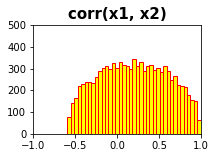

In [6]:
np.random.seed(0)

print('The constraints are shuffled to remove bias. Hence the distribution for rho(X1, X2) is not uniform but close to.')
c1, c2, c3 = [-0.5, -0.4, 0.6]
results_constraints = generate_matrices_trig(10000, 4, 0.01, constraints=[c1, c2, c3], 
                                                 shuffle_constraints=True)[0]
results_constraints = np.array(results_constraints)
print(results_constraints[0])
fig, ax = plt.subplots(figsize=(3, 2))
ax.hist(results_constraints[:, 0, 1], bins=np.linspace(-1, 1, 50), edgecolor='red',color='yellow')
ax.set_xlim(-1, 1)
ax.set_ylim(0, 500)
ax.set_title(f'corr(x1, x2)', fontsize=15, fontweight='bold')
plt.show()

print('The constraints are not shuffled but rho(X1, X2) is sampled first hence its distribution is uniform.')
c1, c2, c3 = [-0.5, -0.4, 0.6]
results_constraints = generate_matrices_trig(10000, 4, 0.01, constraints=[c1, c2, c3], 
                                                 shuffle_constraints=False)[0]
results_constraints = np.array(results_constraints)
print(results_constraints[0])
fig, ax = plt.subplots(figsize=(3, 2))
ax.hist(results_constraints[:, 0, 1], bins=np.linspace(-1, 1, 50), edgecolor='red',color='yellow')
ax.set_xlim(-1, 1)
ax.set_ylim(0, 500)
ax.set_title(f'corr(x1, x2)', fontsize=15, fontweight='bold')
plt.show()

print('The constraints are not shuffled and rho(X1, X2) is sampled last hence its distribution is not uniform.')
results_constraints = generate_matrices_trig(10000, 4, 0.01, constraints=[c3, c1, c2], 
                                                 shuffle_constraints=False)[0]
results_constraints = np.array(results_constraints)
print(results_constraints[0])
fig, ax = plt.subplots(figsize=(3, 2))
ax.hist(results_constraints[:, 1, 2], bins=np.linspace(-1, 1, 50),  edgecolor='red',color='yellow')
ax.set_xlim(-1, 1)
ax.set_ylim(0, 500)
ax.set_title(f'corr(x1, x2)', fontsize=15, fontweight='bold')
plt.show()

Test using 5 columns

## Test using balancing

The constraints from row 3 onwards are shuffled to remove bias. The distribution for rho(X1, X2) should be uniform.
[[ 1.          0.54160253  0.24285659 -0.2295621   0.17799139 -0.5       ]
 [ 0.54160253  1.          0.38858882  0.09473158  0.15374724 -0.4       ]
 [ 0.24285659  0.38858882  1.          0.25846207  0.12705593  0.6       ]
 [-0.2295621   0.09473158  0.25846207  1.         -0.11861146  0.2       ]
 [ 0.17799139  0.15374724  0.12705593 -0.11861146  1.          0.        ]
 [-0.5        -0.4         0.6         0.2         0.          1.        ]]


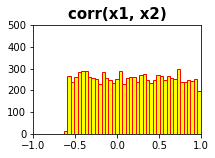

The constraints are not shuffled but rho(X1, X2) is sampled first hence its distribution is uniform.
[[ 1.         -0.19125468  0.25034244  0.22947518 -0.49810119 -0.5       ]
 [-0.19125468  1.         -0.30565064 -0.59356257  0.10541131 -0.4       ]
 [ 0.25034244 -0.30565064  1.          0.43669833 -0.54366057  0.6       ]
 [ 0.22947518 -0.59356257  0.43669833  1.         -0.39558049  0.2       ]
 [-0.49810119  0.10541131 -0.54366057 -0.39558049  1.          0.        ]
 [-0.5        -0.4         0.6         0.2         0.          1.        ]]


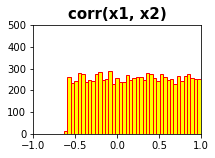

In [7]:
np.random.seed(0)

print('The constraints from row 3 onwards are shuffled to remove bias. The distribution for rho(X1, X2) should be uniform.')
constraints = [-0.5, -0.4, 0.6, 0.2, 0.0]
results_constraints = generate_matrices_trig(10000, 6, 0.01, constraints=constraints, 
                                                 shuffle_constraints=True, balanced=True)[0]
results_constraints = np.array(results_constraints)
print(results_constraints[0])
fig, ax = plt.subplots(figsize=(3, 2))
ax.hist(results_constraints[:, 0, 1], bins=np.linspace(-1, 1, 50), edgecolor='red',color='yellow')
ax.set_xlim(-1, 1)
ax.set_ylim(0, 500)
ax.set_title(f'corr(x1, x2)', fontsize=15, fontweight='bold')
plt.show()

print('The constraints are not shuffled but rho(X1, X2) is sampled first hence its distribution is uniform.')
c1, c2, c3 = [-0.5, -0.4, 0.6]
results_constraints = generate_matrices_trig(10000, 6, 0.01, constraints=constraints, 
                                                 shuffle_constraints=True, balanced=True)[0]
results_constraints = np.array(results_constraints)
print(results_constraints[0])
fig, ax = plt.subplots(figsize=(3, 2))
ax.hist(results_constraints[:, 0, 1], bins=np.linspace(-1, 1, 50), edgecolor='red',color='yellow')
ax.set_xlim(-1, 1)
ax.set_ylim(0, 500)
ax.set_title(f'corr(x1, x2)', fontsize=15, fontweight='bold')
plt.show()

In [8]:
np.random.seed(0)
results_constraints = generate_matrices_trig(1000, 5, 0.01, constraints=[0, 0.1, 0.2, 0.3], shuffle_constraints=True)[0]
for i in range(5):
    print(f'Matrix #{i+1}\n', results_constraints[i])

Matrix #1
 [[ 1.          0.77235913  0.28589291 -0.0542547   0.        ]
 [ 0.77235913  1.          0.10751185 -0.09374928  0.1       ]
 [ 0.28589291  0.10751185  1.          0.25209881  0.2       ]
 [-0.0542547  -0.09374928  0.25209881  1.          0.3       ]
 [ 0.          0.1         0.2         0.3         1.        ]]
Matrix #2
 [[ 1.         -0.21335556  0.65200114 -0.32241535  0.        ]
 [-0.21335556  1.         -0.02354787  0.62259459  0.1       ]
 [ 0.65200114 -0.02354787  1.          0.00472421  0.2       ]
 [-0.32241535  0.62259459  0.00472421  1.          0.3       ]
 [ 0.          0.1         0.2         0.3         1.        ]]
Matrix #3
 [[ 1.          0.19416751 -0.05171746  0.3455646   0.        ]
 [ 0.19416751  1.          0.91134706 -0.39655475  0.1       ]
 [-0.05171746  0.91134706  1.         -0.61230359  0.2       ]
 [ 0.3455646  -0.39655475 -0.61230359  1.          0.3       ]
 [ 0.          0.1         0.2         0.3         1.        ]]
Matrix #4
 [[ 1.   

# 3 - Test using constraints on the first two columns only

Matrix #1
 [[ 1.          0.3631318   0.44328502  0.1261821   0.5       ]
 [ 0.3631318   1.          0.12509984 -0.07987182  0.4       ]
 [ 0.44328502  0.12509984  1.          0.73935043  0.43037873]
 [ 0.1261821  -0.07987182  0.73935043  1.          0.09762701]
 [ 0.5         0.4         0.43037873  0.09762701  1.        ]]
Matrix #2
 [[ 1.          0.69555249  0.55918956 -0.25823198  0.5       ]
 [ 0.69555249  1.          0.19415002 -0.33890647  0.4       ]
 [ 0.55918956  0.19415002  1.          0.22244079 -0.04466977]
 [-0.25823198 -0.33890647  0.22244079  1.         -0.45468741]
 [ 0.5         0.4        -0.04466977 -0.45468741  1.        ]]
Matrix #3
 [[1.         0.78737608 0.22271451 0.9515695  0.5       ]
 [0.78737608 1.         0.46564509 0.83050438 0.4       ]
 [0.22271451 0.46564509 1.         0.29378255 0.5563135 ]
 [0.9515695  0.83050438 0.29378255 1.         0.66523969]
 [0.5        0.4        0.5563135  0.66523969 1.        ]]
Matrix #4
 [[ 1.          0.61053958 -0.5043

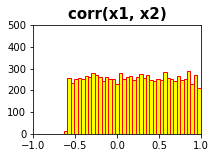

In [9]:
np.random.seed(0)
results_constraints = generate_matrices_trig(10000, 5, 0.01, constraints=[0.5, 0.4], shuffle_constraints=False)[0]
for i in range(5):
    print(f'Matrix #{i+1}\n', results_constraints[i])
    
results_constraints = np.array(results_constraints)
fig, ax = plt.subplots(figsize=(3, 2))
ax.hist(results_constraints[:, 0, 1], bins=np.linspace(-1, 1, 50), edgecolor='red',color='yellow')
ax.set_xlim(-1, 1)
ax.set_ylim(0, 500)
ax.set_title(f'corr(x1, x2)', fontsize=15, fontweight='bold')
plt.show()

# Test using the constraints on the entire correlation matrix

In [10]:
import src.correlations_sampler
importlib.reload(src.correlations_sampler)
from src.correlations_sampler import check_positive_definite, fill_correlation_value

[[ 1.          0.14365587 -0.60259308  0.08976637  0.31765926  0.74733326
   0.32756444  0.33373275  0.58679219 -0.2181219 ]
 [ 0.14365587  1.         -0.82706727  0.09762701 -0.21468622 -0.16740089
   0.17764035 -0.76604789  0.73292583  0.58833166]
 [-0.60259308 -0.82706727  1.         -0.1526904  -0.08418495 -0.36351631
  -0.38409237  0.52131139 -0.93256866 -0.43908754]
 [ 0.08976637  0.09762701 -0.1526904   1.          0.783546    0.43037873
   0.92732552 -0.12482558  0.29178823  0.20552675]
 [ 0.31765926 -0.21468622 -0.08418495  0.783546    1.          0.66267775
   0.79958754  0.2198023   0.16871917 -0.02410721]
 [ 0.74733326 -0.16740089 -0.36351631  0.43037873  0.66267775  1.
   0.66415321  0.26307795  0.51717557  0.00862236]
 [ 0.32756444  0.17764035 -0.38409237  0.92732552  0.79958754  0.66415321
   1.         -0.19318689  0.54435605  0.30378337]
 [ 0.33373275 -0.76604789  0.52131139 -0.12482558  0.2198023   0.26307795
  -0.19318689  1.         -0.51884289 -0.79813565]
 [ 0.586

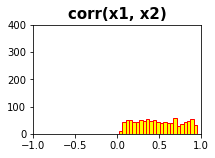

n=4 columns


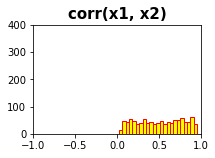

n=5 columns


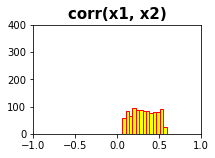

n=6 columns


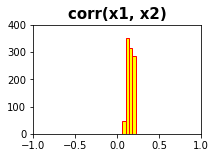

n=7 columns


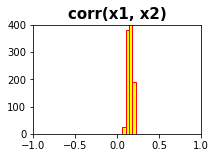

n=8 columns


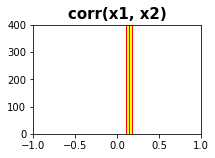

n=9 columns


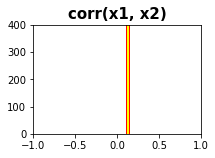

n=10 columns


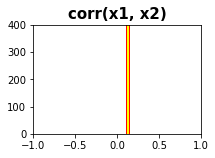

In [11]:
# The seeds used in the slides are 0, 2, and 6.
np.random.seed(0)
base_C = generate_random_correlation_matrix_using_trig(10, constraints=[], K=0.01)[0]
print(base_C)

for n in range(3, 11):
    print(f'n={n} columns')
    C = base_C[:n][:, :n]
    generated_matrices = []
    for i in range(1000):
        generated_matrices.append(fill_correlation_value(C, method='no_fill'))
        #print(generated_matrices[-1])
    generated_matrices = np.array(generated_matrices)
    
    fig, ax = plt.subplots(figsize=(3, 2))
    ax.hist(generated_matrices[:, 0, 1], bins=np.linspace(-1, 1, 50), edgecolor='red',color='yellow')
    ax.set_xlim(-1, 1)
    ax.set_ylim(0, 400)
    ax.set_title(f'corr(x1, x2)', fontsize=15, fontweight='bold')
    plt.show()